# Test Data- EDA- 1 &2, Feature Engineering

# house price prediction: Advance Regression Techniques

All the life cycles in a Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# for viewing all the columns of the dataset
pd.pandas.set_option('display.max_column', None)

In [2]:
# Loading the test dataset
test_data = pd.read_csv('test.csv')

In [3]:
test_data.shape

(1459, 80)

# What we will do in the further steps.
1. Missing Values -> all parameters -> % missing 
2. All the numerical Variables -> analyze their distribution-> Temporal variables(Years)-> their plots
   -> Year Modification(if needed) -> modified plot -> continuous and discrete separation -> discrete count->
    plots -> continuous var -> count ->plot-> modification(if)
3. Categorical Variables -> 
4. Outliers -> plot to visualize the outliers

In [4]:
# Missing values
feature_nan =[]
for feature in test_data.columns:
    if test_data[feature].isnull().sum()>1:
        feature_nan.append(feature)

In [5]:
len(feature_nan) # 23 columns have missing values( nan )

23

In [6]:
for feature in feature_nan:
    print(feature, ' : ', np.round(test_data[feature].isnull().mean(), 4), '%')


MSZoning  :  0.0027 %
LotFrontage  :  0.1556 %
Alley  :  0.9267 %
Utilities  :  0.0014 %
MasVnrType  :  0.011 %
MasVnrArea  :  0.0103 %
BsmtQual  :  0.0302 %
BsmtCond  :  0.0308 %
BsmtExposure  :  0.0302 %
BsmtFinType1  :  0.0288 %
BsmtFinType2  :  0.0288 %
BsmtFullBath  :  0.0014 %
BsmtHalfBath  :  0.0014 %
Functional  :  0.0014 %
FireplaceQu  :  0.5003 %
GarageType  :  0.0521 %
GarageYrBlt  :  0.0535 %
GarageFinish  :  0.0535 %
GarageQual  :  0.0535 %
GarageCond  :  0.0535 %
PoolQC  :  0.9979 %
Fence  :  0.8012 %
MiscFeature  :  0.965 %


In [7]:
# understanding the importance of the missing values ( replacing missing with  1 and rest with 0 
for feature in feature_nan:
    data = test_data.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
#Since we are working on the test data; so we don't have the sale price(dependent var) hence we are skipping the feature plot vs Sale Price

In [8]:
len(test_data['Id']) # id can be got rid of as it is a sequential data (nothing to do with the dataset)

1459

In [9]:
# finding the numerical variables
numerical_feature = []
for feature in test_data.columns:
    if test_data[feature].dtype != 'O':
        numerical_feature.append(feature)

In [10]:
len(numerical_feature)  # length = 37

37

In [11]:
# finding how many of them are Year related features (Temporal Variables)

In [12]:
year_feature =[]
for feature in numerical_feature:
    if 'Yr' in feature or 'Year' in feature:
        year_feature.append(feature)

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
# separating the continuous and the discrete numerical features
# First the discrete features
discrete_feature = []
for feature in numerical_feature:
    if len(test_data[feature].unique()) < 25 and feature not in year_feature:
        discrete_feature.append(feature)

In [15]:
len(discrete_feature) # length = 5

16

In [16]:
# getting the count of unique values in each of the discrete features in the numerical features
for feature in discrete_feature:
    print('count of ', feature, ' is ', len(test_data[feature].unique()))

count of  MSSubClass  is  16
count of  OverallQual  is  10
count of  OverallCond  is  9
count of  LowQualFinSF  is  15
count of  BsmtFullBath  is  5
count of  BsmtHalfBath  is  4
count of  FullBath  is  5
count of  HalfBath  is  3
count of  BedroomAbvGr  is  7
count of  KitchenAbvGr  is  3
count of  TotRmsAbvGrd  is  12
count of  Fireplaces  is  5
count of  GarageCars  is  7
count of  3SsnPorch  is  13
count of  PoolArea  is  7
count of  MoSold  is  12


In [17]:
# Continuous numerical features
continuous_feature =[]
for feature in numerical_feature:
    if len(test_data[feature].unique()) > 25 and feature not in year_feature  and feature not in ['Id']:
        continuous_feature.append(feature)

In [18]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

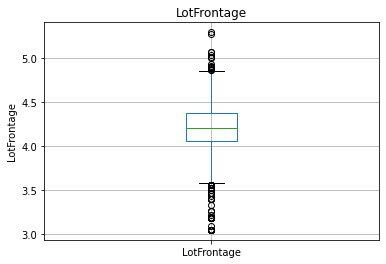

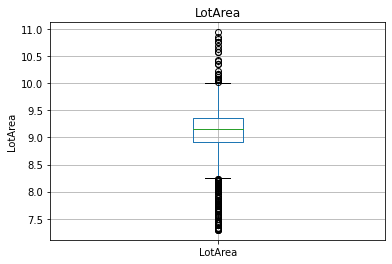

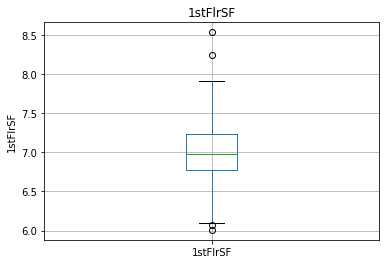

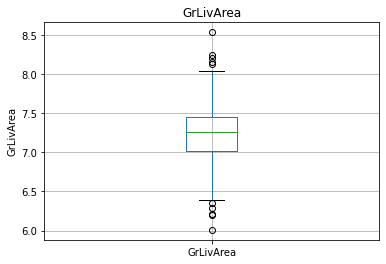

In [19]:
# Outliers:
# data points which are too away from the normal data points
# most of the data are skewed, we need to check the boxplot after log transformation
for feature in continuous_feature:
    data = test_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.title(feature)
        plt.ylabel(feature)
        plt.show()

In [20]:
# Categorical features:
categorical_feature =[]
for feature in test_data.columns:
    if test_data[feature].dtype == 'O':
        categorical_feature.append(feature)

In [21]:
len(categorical_feature) # length  = 43

43

In [22]:
# finding the length of each of the categorical feature, to see 
# if labelEncoding, onehot encoding or any other transformation needs to be done
for feature in categorical_feature:
    print(feature, len(test_data[feature].unique()))

MSZoning 6
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 14
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 5
Functional 8
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 5
GarageCond 6
PavedDrive 3
PoolQC 3
Fence 5
MiscFeature 4
SaleType 10
SaleCondition 6


# Feature Engineering

# Numerical Nan Values

In [23]:
# replacing the numerical null values with their median keeping the original column 
# i.e, create new columns and then make the changes, in the original columns just change the name and replace 
# the missing values with 1 and others with 0.

for feature in test_data.columns:
    if test_data[feature].isnull().sum()>1 and test_data[feature].dtype != 'O':
        print(feature)
        
#Clearly none of the  numerical variables is having null values.

# otherwise we would have replaced the null values with median value.

LotFrontage
MasVnrArea
BsmtFullBath
BsmtHalfBath
GarageYrBlt


In [24]:
#Handing the missing values with a new label 'Missing'
#Created a function to handle the NaN cases

def replace_nan_feature(test_data, feature_nan):
    data = test_data.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data

test_data = replace_nan_feature(test_data, feature_nan)

test_data[feature_nan].isnull().sum()


MSZoning        0
LotFrontage     0
Alley           0
Utilities       0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtFullBath    0
BsmtHalfBath    0
Functional      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [25]:
# since the sum of all the null values = 0, we removed all the null values and replaced them with a new label 'Missing'


In [26]:
# checking the Non-Zero numerical features.
cont_numerical_Nonzero=[]
for feature in continuous_feature:
    data = test_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        cont_numerical_Nonzero.append(feature)
        

In [27]:
# these are continuous numerical features without having 0 value
# we will use log transformation to remove their skewness 
cont_numerical_Nonzero

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [31]:
# log transformation
for feature in cont_numerical_Nonzero:
    test_data[feature] = np.log(test_data[feature])

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method